# Game Recomendations on Steam Platform 

Libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler

DataFiles

In [56]:
# Read the data from files
path = '/Users/manju/Desktop/Data'
df_games = pd.read_csv(path+"/games.csv")
df_users = pd.read_csv(path+"/users.csv")
df_recommendations = pd.read_csv(path+"/recommendations.csv")
df_genre = pd.read_json(path+'/games_metadata.json', lines=True)

Overview

In [57]:
df_games.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True
9,19810,The Sum of All Fears,2008-10-10,True,False,False,Mostly Positive,75,33,9.99,9.99,0.0,True


In [58]:
'''import pandas as pd

# 1) Ensure your column is a datetime dtype
df_games['date'] = pd.to_datetime(df_games['date_release'])

# method A: by year
df_after2020 = df_games[df_games['date'].dt.year > 2019]'''




"import pandas as pd\n\n# 1) Ensure your column is a datetime dtype\ndf_games['date'] = pd.to_datetime(df_games['date_release'])\n\n# method A: by year\ndf_after2020 = df_games[df_games['date'].dt.year > 2019]"

In [59]:
df_users.head(10)

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
5,5664667,145,5
6,5889167,447,2
7,7281762,1083,1
8,7445952,273,1
9,7462927,51,1


In [60]:
df_recommendations.head(10)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
5,306130,0,0,2021-10-10,True,8.6,45425,5
6,238960,0,0,2017-11-25,True,538.8,88282,6
7,730,0,0,2021-11-30,False,157.5,63209,7
8,255710,0,0,2021-05-21,True,18.7,354512,8
9,289070,0,0,2020-05-26,True,397.5,454422,9


In [61]:
df_genre.head(10)

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
5,250180,"“METAL SLUG 3”, the masterpiece in SNK’s emble...","[Arcade, Classic, Action, Co-op, Side Scroller..."
6,253980,Experience incredibly atmospheric and intense ...,"[RPG, Action, Fantasy, Third Person, Hack and ..."
7,271850,,"[Strategy, Simulation, Action, RTS, World War II]"
8,282900,"Packed with fast-paced, turn-based RPG action,...","[Anime, JRPG, Female Protagonist, Cute, RPG, S..."
9,19810,Lead a team of domestic counter-terrorism expe...,"[Action, Tactical]"


In [62]:
#Metadata of Dataframes
df_list = [
    ("df_games", df_games),
    ("df_users", df_users),
    ("df_recommendations", df_recommendations),
    ("df_genre", df_genre)
]

for name, df in df_list:
    print(f"\n📄 DataFrame: {name}")
    df.info()


📄 DataFrame: df_games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB

📄 DataFrame: df_users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (tot

In [63]:
# Converting all object columns to string dtype
df_games = df_games.astype({col: 'string' for col in df_games.select_dtypes(include='object').columns})
df_genre = df_genre.astype({col: 'string' for col in df_genre.select_dtypes(include='object').columns})

# Converting the date related columns to date dtype
df_games['date_release'] = pd.to_datetime(df_games['date_release'])
df_recommendations['date'] = pd.to_datetime(df_recommendations['date'])

In [64]:
#Metadata of Dataframes after datatype conversions
df_list = [
    ("df_games", df_games),
    ("df_users", df_users),
    ("df_recommendations", df_recommendations),
    ("df_genre", df_genre)
]

for name, df in df_list:
    print(f"\n📄 DataFrame: {name}")
    df.info()


📄 DataFrame: df_games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app_id          50872 non-null  int64         
 1   title           50872 non-null  string        
 2   date_release    50872 non-null  datetime64[ns]
 3   win             50872 non-null  bool          
 4   mac             50872 non-null  bool          
 5   linux           50872 non-null  bool          
 6   rating          50872 non-null  string        
 7   positive_ratio  50872 non-null  int64         
 8   user_reviews    50872 non-null  int64         
 9   price_final     50872 non-null  float64       
 10  price_original  50872 non-null  float64       
 11  discount        50872 non-null  float64       
 12  steam_deck      50872 non-null  bool          
dtypes: bool(4), datetime64[ns](1), float64(3), int64(3), string(2)
memory usage: 3.7 MB

In [65]:
for name, df in df_list:
    print(f"Total No. of records in \n📄 DataFrame: {name}")
    print(df.shape[0])

Total No. of records in 
📄 DataFrame: df_games
50872
Total No. of records in 
📄 DataFrame: df_users
14306064
Total No. of records in 
📄 DataFrame: df_recommendations
41154794
Total No. of records in 
📄 DataFrame: df_genre
50872


In [66]:
#Checking for Null Values
for name, df in df_list:
    print(f"\n📄 DataFrame Null Values: {name}")
    print(df.isna().sum())


📄 DataFrame Null Values: df_games
app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

📄 DataFrame Null Values: df_users
user_id     0
products    0
reviews     0
dtype: int64

📄 DataFrame Null Values: df_recommendations
app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

📄 DataFrame Null Values: df_genre
app_id         0
description    0
tags           0
dtype: int64


In [67]:
#Checking for 'app_id' Duplicate Values in all dataframes
for name, df in df_list:
    if 'app_id' in df:
        print(f'Total records count in {name} 📄: ',df.shape[0])
        print(f'Distinct app_id records in {name} 📄: ',df['app_id'].nunique())
        
#Checking for 'user_id' Duplicate Values in df_users
print(f'Total records count in df_users 📄: ',df_users.shape[0])
print(f'Distinct user_id records in df_users 📄: ',df_users['user_id'].nunique()) 

#Checking for duplicated based on combination of app_id & their description
print(f'Total duplicate records count in df_games 📄: ',df_games.duplicated(subset=['app_id', 'title']).sum())
print(f'Total duplicate records count in df_genre 📄: ',df_genre.duplicated(subset=['app_id','description']).sum())     
        

Total records count in df_games 📄:  50872
Distinct app_id records in df_games 📄:  50872
Total records count in df_recommendations 📄:  41154794
Distinct app_id records in df_recommendations 📄:  37610
Total records count in df_genre 📄:  50872
Distinct app_id records in df_genre 📄:  50872
Total records count in df_users 📄:  14306064
Distinct user_id records in df_users 📄:  14306064
Total duplicate records count in df_games 📄:  0
Total duplicate records count in df_genre 📄:  0


Data Preprocessing

In [68]:
#Focusing only on the games available on macos
counts = df_games['mac'].value_counts()
print(counts)

mac
False    37854
True     13018
Name: count, dtype: int64


In [69]:
df_games_processed = df_games.copy()
df_games_processed = df_games_processed[df_games_processed['mac'] == True]

In [70]:
df_games_processed

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
13,29180,Osmos,2009-08-18,True,True,True,Very Positive,88,532,9.99,9.99,0.0,True
18,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,True,True,True,Very Positive,84,294,0.89,2.99,70.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50830,2195430,Two Point Campus: Medical School,2023-08-17,True,True,True,Mixed,50,22,10.00,0.00,0.0,True
50835,2446110,Stacklands: Cursed Worlds,2023-07-25,True,True,False,Very Positive,90,62,4.00,0.00,0.0,True
50848,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,True,True,True,Mixed,67,80,5.00,0.00,0.0,True
50851,1555150,Pocket Bravery,2023-08-31,True,True,True,Very Positive,89,248,20.00,0.00,0.0,True


In [71]:
#Considering only the past 5 years games
df_games_sub = df_games_processed.copy()
df_games_sub['date'] = pd.to_datetime(df_games_sub['date_release'])
df_games_sub = df_games_sub[df_games_sub['date'].dt.year > 2017]

In [72]:
df_games_sub.drop(columns=['win', 'mac','linux','steam_deck','positive_ratio', 'discount', 'price_original', 'date'], inplace=True)

In [73]:

# Define custom order from worst to best (if reversed)
order = ["Overwhelmingly Positive", "Very Positive", "Positive", "Mostly Positive",
         "Mixed", "Mostly Negative", "Negative", "Very Negative", "Overwhelmingly Negative"][::-1]

# Initialize encoder with the custom order
enc = OrdinalEncoder(categories=[order])

# Transform the 'rating' column to ordinal values
df_games_sub[['rating']] = enc.fit_transform(df_games_sub[['rating']])

In [74]:
df_games_sub

,app_id,title,date_release,rating,user_reviews,price_final
22,312200,Chasm,2018-07-30,5.0,1065,19.99
32,1872790,Luckitown,2022-01-19,7.0,163,4.99
39,1259750,Tropico 6 - Spitter,2020-04-23,4.0,36,9.99
56,342310,RIOT: Civil Unrest,2019-02-12,4.0,1280,5.09
60,419990,Ganbare! Super Strikers,2018-07-26,7.0,57,9.99
...,...,...,...,...,...,...
50830,2195430,Two Point Campus: Medical School,2023-08-17,4.0,22,10.00
50835,2446110,Stacklands: Cursed Worlds,2023-07-25,7.0,62,4.00
50848,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,4.0,80,5.00
50851,1555150,Pocket Bravery,2023-08-31,7.0,248,20.00


In [75]:
# Choose the numeric columns to normalize
numeric_cols = ['rating', 'user_reviews', 'price_final']

# Fit scaler and transform
scaler = MinMaxScaler()
df_games_sub[numeric_cols] = scaler.fit_transform(df_games_sub[numeric_cols])

In [76]:
games_processed = pd.merge(df_games_sub, df_genre[['app_id', 'tags']], on='app_id', how='inner')

In [77]:
games_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088 entries, 0 to 7087
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   app_id        7088 non-null   int64         
 1   title         7088 non-null   string        
 2   date_release  7088 non-null   datetime64[ns]
 3   rating        7088 non-null   float64       
 4   user_reviews  7088 non-null   float64       
 5   price_final   7088 non-null   float64       
 6   tags          7088 non-null   string        
dtypes: datetime64[ns](1), float64(3), int64(1), string(2)
memory usage: 387.8 KB


In [78]:
games_processed

,app_id,title,date_release,rating,user_reviews,price_final,tags
0,312200,Chasm,2018-07-30,0.625,0.001341,0.074040,"['Metroidvania', 'Indie', 'Pixel Graphics', 'A..."
1,1872790,Luckitown,2022-01-19,0.875,0.000194,0.018482,"['Simulation', 'Tower Defense', 'Strategy', 'T..."
2,1259750,Tropico 6 - Spitter,2020-04-23,0.500,0.000033,0.037001,"['Simulation', 'Strategy']"
3,342310,RIOT: Civil Unrest,2019-02-12,0.500,0.001614,0.018853,"['Strategy', 'Simulation', 'Indie', 'Pixel Gra..."
4,419990,Ganbare! Super Strikers,2018-07-26,0.875,0.000060,0.037001,"['Football (Soccer)', 'Sports', 'Strategy', 'R..."
...,...,...,...,...,...,...,...
7083,2195430,Two Point Campus: Medical School,2023-08-17,0.500,0.000015,0.037038,[]
7084,2446110,Stacklands: Cursed Worlds,2023-07-25,0.875,0.000066,0.014815,"['Simulation', 'Indie', 'Casual', 'Survival', ..."
7085,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,0.500,0.000089,0.018519,"['Strategy', 'Indie', 'Simulation']"
7086,1555150,Pocket Bravery,2023-08-31,0.875,0.000303,0.074077,[]


In [79]:
games_processed = (
    games_processed
      .dropna(subset=['tags'])                  # remove NaNs in tags
      [ games_processed['tags'].map(len) > 2 ]  # then remove empty lists
)

In [80]:
games_processed

,app_id,title,date_release,rating,user_reviews,price_final,tags
0,312200,Chasm,2018-07-30,0.625,0.001341,0.074040,"['Metroidvania', 'Indie', 'Pixel Graphics', 'A..."
1,1872790,Luckitown,2022-01-19,0.875,0.000194,0.018482,"['Simulation', 'Tower Defense', 'Strategy', 'T..."
2,1259750,Tropico 6 - Spitter,2020-04-23,0.500,0.000033,0.037001,"['Simulation', 'Strategy']"
3,342310,RIOT: Civil Unrest,2019-02-12,0.500,0.001614,0.018853,"['Strategy', 'Simulation', 'Indie', 'Pixel Gra..."
4,419990,Ganbare! Super Strikers,2018-07-26,0.875,0.000060,0.037001,"['Football (Soccer)', 'Sports', 'Strategy', 'R..."
...,...,...,...,...,...,...,...
7076,1410330,Love Shore,2023-06-30,0.500,0.000033,0.055521,"['Cyberpunk', 'RPG', 'Choices Matter', 'Noir',..."
7077,2159650,Drift,2023-05-12,0.500,0.000033,0.059224,"['Open World Survival Craft', 'Survival', 'Onl..."
7081,2349040,Dinky Guardians,2023-10-02,0.750,0.000008,0.048150,"['Automation', 'Simulation', 'Co-op', 'Colony ..."
7084,2446110,Stacklands: Cursed Worlds,2023-07-25,0.875,0.000066,0.014815,"['Simulation', 'Indie', 'Casual', 'Survival', ..."


In [81]:
common_game_ids = games_processed['app_id'].unique()
recommendations = df_recommendations[df_recommendations['app_id'].isin(common_game_ids)].copy()

In [82]:
recommendations.count()

app_id            2462033
helpful           2462033
funny             2462033
date              2462033
is_recommended    2462033
hours             2462033
user_id           2462033
review_id         2462033
dtype: int64

In [83]:
recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
73932,1218210,8,0,2022-07-13,True,119.5,4159892,73932
76525,1218210,6,0,2022-04-09,True,24.3,9824132,76525
132577,1218210,14,0,2022-04-01,True,11.7,11311605,132577
254185,1218210,2,0,2022-06-30,True,32.7,3830708,254185
300086,1218210,123,36,2022-04-04,False,32.5,11545696,300086
...,...,...,...,...,...,...,...,...
41154745,1104450,0,0,2020-07-29,True,3.0,9985656,41154745
41154746,893850,0,0,2020-09-14,True,128.0,821144,41154746
41154748,1404850,0,0,2021-04-15,True,8.0,11065427,41154748
41154769,1138660,0,0,2021-08-13,False,11.0,10433531,41154769


In [84]:
#Droping the review_id column & coverting booolean to numeric
recommendations.drop(columns=['review_id'], inplace=True)
recommendations['is_recommended'] = recommendations['is_recommended'].astype(int)

In [85]:
recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id
73932,1218210,8,0,2022-07-13,1,119.5,4159892
76525,1218210,6,0,2022-04-09,1,24.3,9824132
132577,1218210,14,0,2022-04-01,1,11.7,11311605
254185,1218210,2,0,2022-06-30,1,32.7,3830708
300086,1218210,123,36,2022-04-04,0,32.5,11545696
...,...,...,...,...,...,...,...
41154745,1104450,0,0,2020-07-29,1,3.0,9985656
41154746,893850,0,0,2020-09-14,1,128.0,821144
41154748,1404850,0,0,2021-04-15,1,8.0,11065427
41154769,1138660,0,0,2021-08-13,0,11.0,10433531


In [86]:
count = (recommendations['hours'] < 2).sum()
count

np.int64(388951)

In [87]:
recommendations_df = recommendations[recommendations['hours'] > 2].copy()

In [88]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id
73932,1218210,8,0,2022-07-13,1,119.5,4159892
76525,1218210,6,0,2022-04-09,1,24.3,9824132
132577,1218210,14,0,2022-04-01,1,11.7,11311605
254185,1218210,2,0,2022-06-30,1,32.7,3830708
300086,1218210,123,36,2022-04-04,0,32.5,11545696
...,...,...,...,...,...,...,...
41154745,1104450,0,0,2020-07-29,1,3.0,9985656
41154746,893850,0,0,2020-09-14,1,128.0,821144
41154748,1404850,0,0,2021-04-15,1,8.0,11065427
41154769,1138660,0,0,2021-08-13,0,11.0,10433531


In [89]:
#Compute max hours_played per user
user_max_hours = recommendations_df.groupby('user_id')['hours'].max().reset_index()
user_max_hours.rename(columns={'hours': 'max_hours'}, inplace=True)

# Merge with original DataFrame
recommendations_df = recommendations_df.merge(user_max_hours, on='user_id')

#Compute implicit rating
recommendations_df['rating'] = recommendations_df['hours'] / recommendations_df['max_hours']

In [90]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,max_hours,rating
0,1218210,8,0,2022-07-13,1,119.5,4159892,119.5,1.000000
1,1218210,6,0,2022-04-09,1,24.3,9824132,32.7,0.743119
2,1218210,14,0,2022-04-01,1,11.7,11311605,33.2,0.352410
3,1218210,2,0,2022-06-30,1,32.7,3830708,32.7,1.000000
4,1218210,123,36,2022-04-04,0,32.5,11545696,35.6,0.912921
...,...,...,...,...,...,...,...,...,...
2038284,1104450,0,0,2020-07-29,1,3.0,9985656,3.0,1.000000
2038285,893850,0,0,2020-09-14,1,128.0,821144,128.0,1.000000
2038286,1404850,0,0,2021-04-15,1,8.0,11065427,8.0,1.000000
2038287,1138660,0,0,2021-08-13,0,11.0,10433531,25.0,0.440000


In [91]:
recommendations_df.drop(columns=['max_hours'], inplace=True)

In [92]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,rating
0,1218210,8,0,2022-07-13,1,119.5,4159892,1.000000
1,1218210,6,0,2022-04-09,1,24.3,9824132,0.743119
2,1218210,14,0,2022-04-01,1,11.7,11311605,0.352410
3,1218210,2,0,2022-06-30,1,32.7,3830708,1.000000
4,1218210,123,36,2022-04-04,0,32.5,11545696,0.912921
...,...,...,...,...,...,...,...,...
2038284,1104450,0,0,2020-07-29,1,3.0,9985656,1.000000
2038285,893850,0,0,2020-09-14,1,128.0,821144,1.000000
2038286,1404850,0,0,2021-04-15,1,8.0,11065427,1.000000
2038287,1138660,0,0,2021-08-13,0,11.0,10433531,0.440000


In [93]:
# Choose the numeric columns to normalize
numeric_cols = ['helpful', 'funny', 'hours']

# Fit scaler and transform
scaler = MinMaxScaler()
recommendations_df[numeric_cols] = scaler.fit_transform(recommendations_df[numeric_cols])

In [94]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,rating
0,1218210,0.000410,0.000000,2022-07-13,1,0.117647,4159892,1.000000
1,1218210,0.000307,0.000000,2022-04-09,1,0.022247,9824132,0.743119
2,1218210,0.000717,0.000000,2022-04-01,1,0.009620,11311605,0.352410
3,1218210,0.000102,0.000000,2022-06-30,1,0.030664,3830708,1.000000
4,1218210,0.006297,0.004308,2022-04-04,0,0.030464,11545696,0.912921
...,...,...,...,...,...,...,...,...
2038284,1104450,0.000000,0.000000,2020-07-29,1,0.000902,9985656,1.000000
2038285,893850,0.000000,0.000000,2020-09-14,1,0.126165,821144,1.000000
2038286,1404850,0.000000,0.000000,2021-04-15,1,0.005912,11065427,1.000000
2038287,1138660,0.000000,0.000000,2021-08-13,0,0.008919,10433531,0.440000


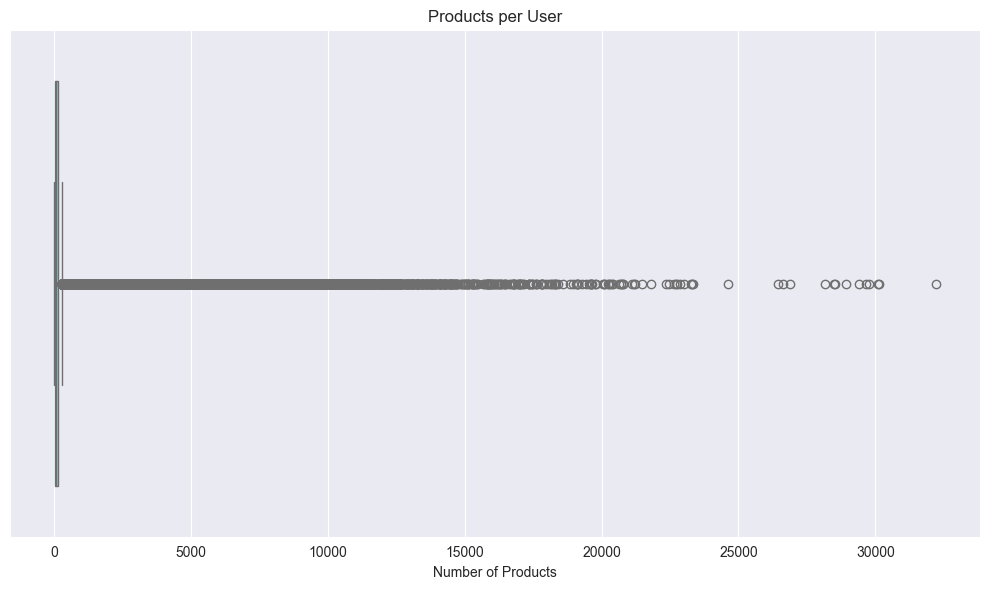

In [95]:
users = df_users.copy()
plt.figure(figsize=(10, 6))
sns.boxplot(x='products', data=users, color='skyblue')
plt.title('Products per User')
plt.xlabel('Number of Products')
plt.tight_layout()
plt.show()

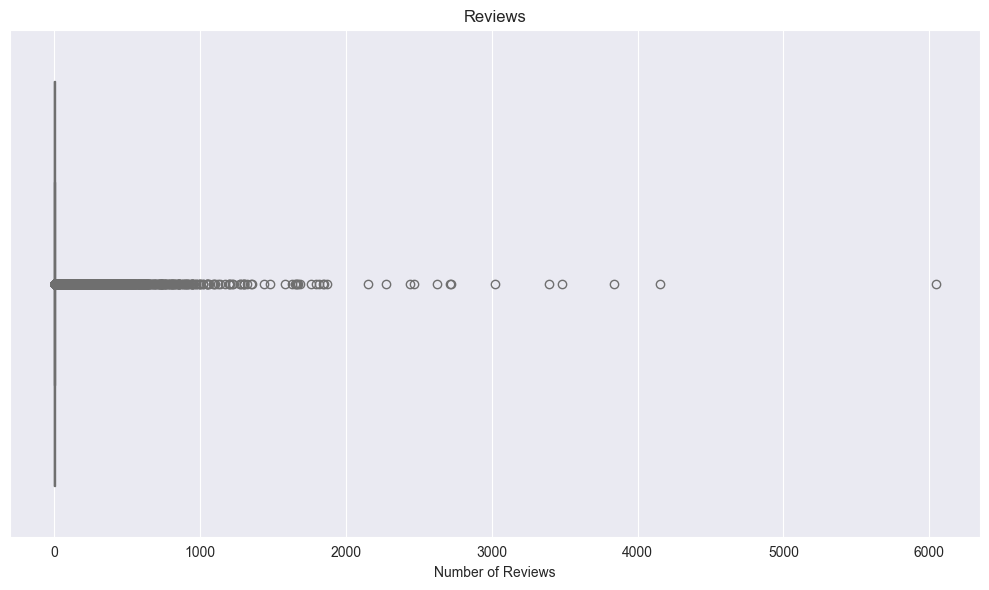

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='reviews', data=users, color='skyblue')
plt.title('Reviews')
plt.xlabel('Number of Reviews')
plt.tight_layout()
plt.show()

In [97]:
# Choose the numeric columns to normalize
numeric_cols = ['products', 'reviews']

# Fit scaler and transform
scaler = MinMaxScaler()
df_users[numeric_cols] = scaler.fit_transform(df_users[numeric_cols])

In [98]:
df_users

,user_id,products,reviews
0,7360263,0.011144,0.000000
1,14020781,0.004843,0.000165
2,8762579,0.010213,0.000662
3,4820647,0.005463,0.000662
4,5167327,0.003042,0.000331
...,...,...,...
14306059,5047430,0.000186,0.000000
14306060,5048153,0.000000,0.000000
14306061,5059205,0.000962,0.000000
14306062,5074363,0.000000,0.000000


# Embedded based Recommendations system

In [99]:
recommendations_df.rename(columns={'rating': 'hours_rating'}, inplace=True)


In [100]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,hours_rating
0,1218210,0.000410,0.000000,2022-07-13,1,0.117647,4159892,1.000000
1,1218210,0.000307,0.000000,2022-04-09,1,0.022247,9824132,0.743119
2,1218210,0.000717,0.000000,2022-04-01,1,0.009620,11311605,0.352410
3,1218210,0.000102,0.000000,2022-06-30,1,0.030664,3830708,1.000000
4,1218210,0.006297,0.004308,2022-04-04,0,0.030464,11545696,0.912921
...,...,...,...,...,...,...,...,...
2038284,1104450,0.000000,0.000000,2020-07-29,1,0.000902,9985656,1.000000
2038285,893850,0.000000,0.000000,2020-09-14,1,0.126165,821144,1.000000
2038286,1404850,0.000000,0.000000,2021-04-15,1,0.005912,11065427,1.000000
2038287,1138660,0.000000,0.000000,2021-08-13,0,0.008919,10433531,0.440000


In [101]:
'''#Merge both the dataframes
games_processed_df.set_index('app_id', inplace=True)
recommendations_df = recommendations_df.join(games_processed_df, on='app_id', how='inner')'''


"#Merge both the dataframes\ngames_processed_df.set_index('app_id', inplace=True)\nrecommendations_df = recommendations_df.join(games_processed_df, on='app_id', how='inner')"

In [102]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,hours_rating
0,1218210,0.000410,0.000000,2022-07-13,1,0.117647,4159892,1.000000
1,1218210,0.000307,0.000000,2022-04-09,1,0.022247,9824132,0.743119
2,1218210,0.000717,0.000000,2022-04-01,1,0.009620,11311605,0.352410
3,1218210,0.000102,0.000000,2022-06-30,1,0.030664,3830708,1.000000
4,1218210,0.006297,0.004308,2022-04-04,0,0.030464,11545696,0.912921
...,...,...,...,...,...,...,...,...
2038284,1104450,0.000000,0.000000,2020-07-29,1,0.000902,9985656,1.000000
2038285,893850,0.000000,0.000000,2020-09-14,1,0.126165,821144,1.000000
2038286,1404850,0.000000,0.000000,2021-04-15,1,0.005912,11065427,1.000000
2038287,1138660,0.000000,0.000000,2021-08-13,0,0.008919,10433531,0.440000


In [103]:
def create_cold_start_split(recommendations_df, test_size=0.15, val_size=0.15,
                            timestamp_col='date', cold_start_user_frac=0.1, cold_start_item_frac=0.1, seed=42):
    import numpy as np
    np.random.seed(seed)

    # Sort by timestamp if available
    if timestamp_col in recommendations_df.columns:
        recommendations_df = recommendations_df.sort_values(timestamp_col)

    # Identify cold-start users and items
    all_users = recommendations_df['user_id'].unique()
    all_items = recommendations_df['app_id'].unique()

    n_cold_users = int(len(all_users) * cold_start_user_frac * test_size)
    n_cold_items = int(len(all_items) * cold_start_item_frac * test_size)

    cold_users = np.random.choice(all_users, size=n_cold_users, replace=False)
    cold_items = np.random.choice(all_items, size=n_cold_items, replace=False)

    # Cold-start test data
    cold_user_df = recommendations_df[recommendations_df['user_id'].isin(cold_users)]
    cold_item_df = recommendations_df[recommendations_df['app_id'].isin(cold_items)]

    # Remove cold users/items from the remaining dataset
    warm_df = recommendations_df[
        ~recommendations_df['user_id'].isin(cold_users) &
        ~recommendations_df['app_id'].isin(cold_items)
    ]

    # Now split warm_df by user chronologically
    user_groups = warm_df.groupby('user_id')

    train_data = []
    val_data = []
    test_data = []

    for user_id, user_data in user_groups:
        n = len(user_data)
        if n < 3:
            continue

        n_test = max(1, int(n * test_size))
        n_val = max(1, int(n * val_size))

        user_train = user_data.iloc[:-n_test-n_val]
        user_val = user_data.iloc[-n_test-n_val:-n_test]
        user_test = user_data.iloc[-n_test:]

        train_data.append(user_train)
        val_data.append(user_val)
        test_data.append(user_test)

    train_df = pd.concat(train_data)
    val_df = pd.concat(val_data)
    test_df = pd.concat(test_data)

    return train_df, val_df, test_df, cold_user_df, cold_item_df


train_df, val_df, test_df, cold_user_df, cold_item_df = create_cold_start_split(recommendations_df)

print(f"Train Set: {len(train_df)} Recommendations")
print(f"Validation Set: {len(val_df)} Recommendations")
print(f"Test Set: {len(test_df)} Recommendations")
print(f"Cold-Start Test Set: {len(cold_user_df)} Users, {len(cold_item_df)} Items")

Train Set: 255131 Recommendations
Validation Set: 102616 Recommendations
Test Set: 102616 Recommendations
Cold-Start Test Set: 30817 Users, 13141 Items


In [105]:
import pandas as pd

all_user_idx = (
    pd.Index(recommendations_df.user_id)
)
all_user_ids = all_user_idx.unique().to_numpy()

all_game_idx = (
    pd.Index(train_df.app_id)
      .union(val_df.app_id)
      .union(test_df.app_id)
      .union(games_processed.app_id)
)
all_game_ids = all_game_idx.unique().to_numpy()

In [106]:
from ast import literal_eval
from lightfm.data import Dataset

# Make sure tags are real lists, not strings:
games_processed['tags'] = games_processed['tags'].apply(literal_eval)

def item_feats():
    for _, row in games_processed.iterrows():
        tags = row['tags']  # e.g. ['Simulation', 'Strategy', …]

        # build a dict of tag→1.0 plus your numeric features
        feat_dict = {tag: 1.0 for tag in tags}
        feat_dict['price_final'] = row['price_final']
        feat_dict['rating']      = row['rating']

        # **THIS** is critical:
        yield row['app_id'], feat_dict



In [107]:
from lightfm.data import Dataset
from lightfm import LightFM

#fit Dataset on all IDs & features
dataset = Dataset()
dataset.fit(
    users = all_user_ids,
    items = all_game_ids,
    item_features = set(f for tags in games_processed.tags for f in tags)
                  | {'rating','price_final'}, # including the numeric feature names
    user_features = ['hours_rating']
)


In [108]:
#Train interaction matrix
train_interactions, _ = dataset.build_interactions(
    (row.user_id, row.app_id, row.hours_rating)
    for row in train_df.itertuples()
)

In [109]:
item_features = dataset.build_item_features(item_feats(), normalize=False)

In [110]:
# Test Data Interactions
test_interactions, _ = dataset.build_interactions(
    (row['user_id'], row['app_id'], row['hours_rating'])
    for _, row in test_df.iterrows()
)

In [111]:
print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

Train: 255131, Val: 102616, Test: 102616


In [112]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k, recall_at_k

print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

# Build interactions for each split
tr_inter, _  = dataset.build_interactions(
    (u, i, r)
    for u, i, r in zip(train_df['user_id'],
                       train_df['app_id'],
                       train_df['hours_rating'])
)
val_inter, _ = dataset.build_interactions(
    (u, i, r)
    for u, i, r in zip(val_df['user_id'],
                       val_df['app_id'],
                       val_df['hours_rating'])
)
test_inter, _ = dataset.build_interactions(
    (u, i, r)
    for u, i, r in zip(test_df['user_id'],
                       test_df['app_id'],
                       test_df['hours_rating'])
)

# Fit on just the train split
model = LightFM(loss='warp', no_components=60, learning_rate=0.05)
model.fit(tr_inter,
          item_features=item_features,
          epochs=10,
          num_threads=4)

# 4. Evaluate on validation
val_p = precision_at_k(model, val_inter,
                       item_features=item_features, k=20).mean()
val_r = recall_at_k(   model, val_inter,
                       item_features=item_features, k=20).mean()
print(f"Validation — Precision@20: {val_p:.4f}, Recall@20: {val_r:.4f}")




Train: 255131, Val: 102616, Test: 102616
Validation — Precision@20: 0.0092, Recall@20: 0.1796


In [113]:
from sklearn.model_selection import train_test_split, ParameterGrid
from lightfm import LightFM
from lightfm.evaluation import precision_at_k, recall_at_k
import numpy as np
import pandas as pd

# hyperparameter grid
param_grid = {
    'no_components':      [30, 60],
    'learning_rate':      [0.01, 0.05],
    'item_alpha':         [1e-6, 1e-5],
    'user_alpha':         [1e-6, 1e-5],
    'loss':               ['warp'],#, 'bpr', 'logistic'
    'learning_schedule':  ['adagrad', 'adadelta'],
    #'max_sampled':        [10, 20]    # only used by WARP/BPR losses
}

results = []
for params in ParameterGrid(param_grid):
    # instantiate model with this combo
    model = LightFM(
        no_components     = params['no_components'],
        learning_rate     = params['learning_rate'],
        item_alpha        = params['item_alpha'],
        user_alpha        = params['user_alpha'],
        loss              = params['loss'],
        learning_schedule = params['learning_schedule']
       # max_sampled       = params['max_sampled']
    )

    # train on the TRAIN split
    model.fit(
        tr_inter,
        item_features = item_features,
        epochs        = 10,
        num_threads   = 8,
        verbose       = False
    )

    # evaluate on the VAL split
    prec_val = precision_at_k(
        model, val_inter,
        item_features = item_features,
        k             = 20,
        num_threads   = 8
    ).mean()

    rec_val  = recall_at_k(
        model, val_inter,
        item_features = item_features,
        k             = 20,
        num_threads   = 8
    ).mean()

    # record results
    results.append({
        **params,
        'prec_val':    prec_val,
        'rec_val':     rec_val,
    })

    print(results)

# Tabulate and sort by validation precision
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('prec_val', ascending=False).reset_index(drop=True)

print(results_df)


[{'item_alpha': 1e-06, 'learning_rate': 0.01, 'learning_schedule': 'adagrad', 'loss': 'warp', 'no_components': 30, 'user_alpha': 1e-06, 'prec_val': np.float32(0.009412451), 'rec_val': np.float64(0.1829842780454294)}]
[{'item_alpha': 1e-06, 'learning_rate': 0.01, 'learning_schedule': 'adagrad', 'loss': 'warp', 'no_components': 30, 'user_alpha': 1e-06, 'prec_val': np.float32(0.009412451), 'rec_val': np.float64(0.1829842780454294)}, {'item_alpha': 1e-06, 'learning_rate': 0.01, 'learning_schedule': 'adagrad', 'loss': 'warp', 'no_components': 30, 'user_alpha': 1e-05, 'prec_val': np.float32(0.009216669), 'rec_val': np.float64(0.17922315478640327)}]
[{'item_alpha': 1e-06, 'learning_rate': 0.01, 'learning_schedule': 'adagrad', 'loss': 'warp', 'no_components': 30, 'user_alpha': 1e-06, 'prec_val': np.float32(0.009412451), 'rec_val': np.float64(0.1829842780454294)}, {'item_alpha': 1e-06, 'learning_rate': 0.01, 'learning_schedule': 'adagrad', 'loss': 'warp', 'no_components': 30, 'user_alpha': 1e-0

In [115]:
#Concatenate the train + validation DataFrames
combined_df = pd.concat([train_df, val_df], ignore_index=True)

# Build the sparse interaction matrix
#    (this also handles mapping raw IDs → internal row/col indices)
combined_interactions, _ = dataset.build_interactions(
    (u, i, r)
    for u, i, r in zip(
        combined_df['user_id'],
        combined_df['app_id'],
        combined_df['hours_rating']
    )
)

# Grab the best hyperparameters you found
best = results_df.iloc[0]
best_params = {
    'loss':          'warp',
    'no_components': int(best['no_components']),
    'learning_rate': float(best['learning_rate']),
    'item_alpha':    float(best['item_alpha']),
    'user_alpha':    float(best['user_alpha']),
    'learning_schedule': best['learning_schedule'],
}

print("Final training with:", best_params)

# Initialize and train on the **sparse** interactions matrix
final_model = LightFM(**best_params)
final_model.fit(
    combined_interactions,
    item_features=item_features,   # if you have them
    user_features=None,
    epochs=30,
    num_threads=4
)


Final training with: {'loss': 'warp', 'no_components': 60, 'learning_rate': 0.05, 'item_alpha': 1e-06, 'user_alpha': 1e-06, 'learning_schedule': 'adadelta'}


In [ ]:

# (Optional) to Save your model
import pickle
with open('lightfm_final_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)
print("✅  Final model trained and saved.")

In [117]:
from lightfm.evaluation import precision_at_k, recall_at_k, auc_score
import numpy as np
import pandas as pd

# Build your test interactions matrix exactly like before:
#    assume you have a DataFrame `df_test` with columns user_id, app_id, hours_rating
test_interactions, _ = dataset.build_interactions(
    (u, i, r)
    for u, i, r in zip(
        test_df['user_id'],
        test_df['app_id'],
        test_df['hours_rating']
    )
)

# Choose the cut‑offs you care about
Ks = [5, 10, 20]

# Compute metrics for each K
results = []
for K in Ks:
    prec = precision_at_k(final_model,
                          test_interactions,
                          item_features=item_features,
                          k=K).mean()
    rec  = recall_at_k   (final_model,
                          test_interactions,
                          item_features=item_features,
                          k=K).mean()
    f1_score = np.where(
    (prec + rec) > 0,
    2 * prec * rec / (prec + rec),
    0.0)
    results.append({
        'K': K,
        'precision': prec,
        'recall':    rec,
        'f1_score': f1_score
    })



# Compute AUC (independent of K)
auc = auc_score(final_model,
                test_interactions,
                item_features=item_features).mean()

# Tabulate
results_df = pd.DataFrame(results)
results_df['auc'] = auc  # same AUC for every row, or move it out separately

print("Test-set performance:")
print(results_df)
print(f"\nOverall AUC: {auc:.4f}")


Test-set performance:
    K  precision    recall              f1_score       auc
0   5   0.011677  0.057414  0.019406687810884858  0.889274
1  10   0.010575  0.104020  0.019198730053466995  0.889274
2  20   0.008721  0.171198  0.016596614890153374  0.889274

Overall AUC: 0.8893


In [120]:

cold_user_inter, _ = dataset.build_interactions(
    (u, i)
    for u, i in zip(
        cold_user_df['user_id'],
        cold_user_df['app_id']
    )
)

cold_item_inter, _ = dataset.build_interactions(
    (u, i )
    for u, i in zip(
        cold_item_df['user_id'],
        cold_item_df['app_id']
    )
)


In [ ]:
# Choose the cut‑offs you care about
Ks = [5, 10, 20]

# Compute metrics for each K
cold_user_results = []
for K in Ks:
    prec = precision_at_k(final_model,
                          cold_user_inter,
                          item_features=item_features,
                          k=K).mean()
    rec  = recall_at_k   (final_model,
                          cold_user_inter,
                          item_features=item_features,
                          k=K).mean()
    f1_score = np.where(
    (prec + rec) > 0,
    2 * prec * rec / (prec + rec),
    0.0)
    results.append({
        'K': K,
        'precision': prec,
        'recall':    rec,
        'f1_score': f1_score
    })



# Compute AUC (independent of K)
auc = auc_score(final_model,
                cold_user_inter,
                item_features=item_features).mean()


# Tabulate
cold_user_results_df = pd.DataFrame(cold_user_results)
cold_user_results_df['auc'] = auc  # same AUC for every row, or move it out separately

print("Test-set performance:")
print(cold_user_results_df)
print(f"\nOverall AUC: {auc:.4f}")
